In [1]:
from datamodules import LagrangianSHMUDataModule
from pathlib import Path
from utils.config import load_config

confpath = Path("") / "configs/training"
dsconf = load_config(confpath / "lagrangian_datasets.yaml")
modelconf = load_config(confpath / "lcnn.yaml")

datamodule = LagrangianSHMUDataModule(dsconf, modelconf.train_params)
datamodule.setup("test")
dataset = datamodule.test_dataset

test_dataloader = datamodule.test_dataloader()

/opt/anacondas/anaconda3/envs/nowcasting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pysteps configuration file found at: /opt/anacondas/anaconda3/envs/nowcasting/lib/python3.10/site-packages/pysteps/pystepsrc



In [2]:
import torch
from models import LCNN

model = LCNN(modelconf).load_from_checkpoint("/data/softec-lagrangian-nowcasting/checkpoints/lcnn-bugfix/epoch=8-step=10611.ckpt", config=modelconf, map_location=torch.device('cuda:0'))

In [3]:
x = dataset[36][0]
x = torch.unsqueeze(torch.squeeze(x), dim=0).float().to('cuda:0')

In [4]:
pred = model(x)

pred = pred.detach().cpu().numpy()
# mf = mf[0].detach().cpu().numpy()

RuntimeError: Given groups=1, weight of size [64, 5, 3, 3], expected input[1, 6, 336, 336] to have 5 channels, but got 6 channels instead

In [4]:
x_np = x[0].detach().cpu().numpy()

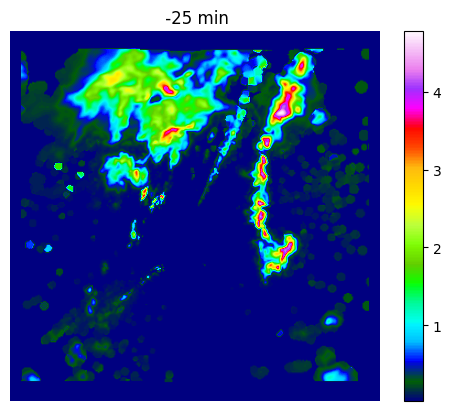

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML

fig, ax = plt.subplots()

# x_np[0][x_np[0] < 0] = 0

plt.imshow(x_np[0], cmap='gist_ncar')
cbar = plt.colorbar()

def update(frame):
    plt.imshow(x_np[frame], cmap='gist_ncar', vmin=cbar.vmin, vmax=cbar.vmax)
    # plt.title(f"{(frame-5)*5:+4d} min")
    plt.axis('off')
    plt.title(f"{(frame-5)*5:+4d} min")

ani = animate.FuncAnimation(fig=fig, func=update, frames=6)
HTML(ani.to_jshtml())

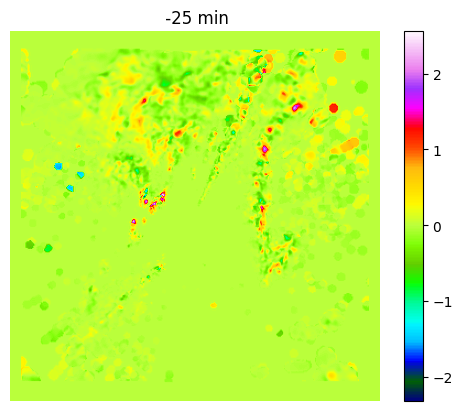

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML

fig, ax = plt.subplots()

plt.imshow(x_np[0], cmap='gist_ncar')
cbar = plt.colorbar()

def update(frame):
    plt.imshow(x_np[frame], cmap='gist_ncar', vmin=cbar.vmin, vmax=cbar.vmax)
    # plt.title(f"{(frame-5)*5:+4d} min")
    plt.axis('off')
    plt.title(f"{(frame-5)*5:+4d} min")

ani = animate.FuncAnimation(fig=fig, func=update, frames=5)
HTML(ani.to_jshtml())